In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
dataframe= pd.read_csv("C:/Users/Maggi/Downloads/Zomatodataset.csv.csv")
print(dataframe)


                      name online_order book_table   rate  votes  \
0                    Jalsa          Yes        Yes  4.1/5    775   
1           Spice Elephant          Yes         No  4.1/5    787   
2          San Churro Cafe          Yes         No  3.8/5    918   
3    Addhuri Udupi Bhojana           No         No  3.7/5     88   
4            Grand Village           No         No  3.8/5    166   
..                     ...          ...        ...    ...    ...   
143       Melting Melodies           No         No  3.3/5      0   
144        New Indraprasta           No         No  3.3/5      0   
145           Anna Kuteera          Yes         No  4.0/5    771   
146                 Darbar           No         No  3.0/5     98   
147          Vijayalakshmi          Yes         No  3.9/5     47   

     approx_cost(for two people) listed_in(type)  
0                            800          Buffet  
1                            800          Buffet  
2                            8

In [25]:
print(dataframe.head())
print(dataframe.tail())

                    name online_order book_table  rate  votes  \
0                  Jalsa          Yes        Yes   4.1    775   
1         Spice Elephant          Yes         No   4.1    787   
2        San Churro Cafe          Yes         No   3.8    918   
3  Addhuri Udupi Bhojana           No         No   3.7     88   
4          Grand Village           No         No   3.8    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  
                 name online_order book_table  rate  votes  \
143  Melting Melodies           No         No   3.3      0   
144   New Indraprasta           No         No   3.3      0   
145      Anna Kuteera          Yes         No   4.0    771   
146            Darbar           No         No   3.0     98   
147  

In [21]:
def handleRate(value):
    value=str(value).split('/')
    value=value[0];
    return float(value)
 
dataframe['rate']=dataframe['rate'].apply(handleRate)
print(dataframe.head())

                    name online_order book_table  rate  votes  \
0                  Jalsa          Yes        Yes   4.1    775   
1         Spice Elephant          Yes         No   4.1    787   
2        San Churro Cafe          Yes         No   3.8    918   
3  Addhuri Udupi Bhojana           No         No   3.7     88   
4          Grand Village           No         No   3.8    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


In [27]:
print(dataframe.shape)
print(dataframe.isnull())

(148, 7)
      name  online_order  book_table   rate  votes  \
0    False         False       False  False  False   
1    False         False       False  False  False   
2    False         False       False  False  False   
3    False         False       False  False  False   
4    False         False       False  False  False   
..     ...           ...         ...    ...    ...   
143  False         False       False  False  False   
144  False         False       False  False  False   
145  False         False       False  False  False   
146  False         False       False  False  False   
147  False         False       False  False  False   

     approx_cost(for two people)  listed_in(type)  
0                          False            False  
1                          False            False  
2                          False            False  
3                          False            False  
4                          False            False  
..                           .

In [28]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


Text(0.5, 0, 'Type of restaurant')

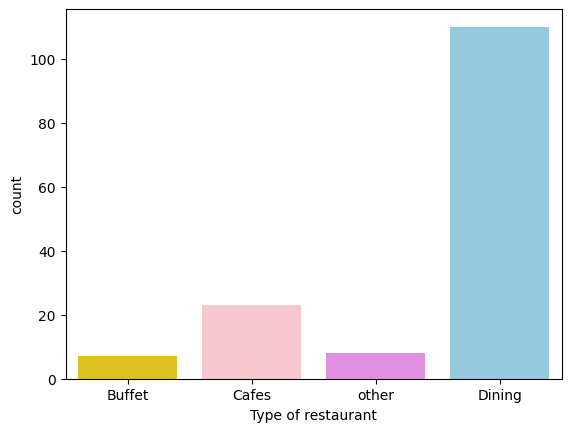

In [36]:
sns.countplot(x=dataframe['listed_in(type)'],hue=dataframe['listed_in(type)'],palette=["gold","pink","violet","skyblue"])
plt.xlabel("Type of restaurant")

Text(0, 0.5, 'Votes')

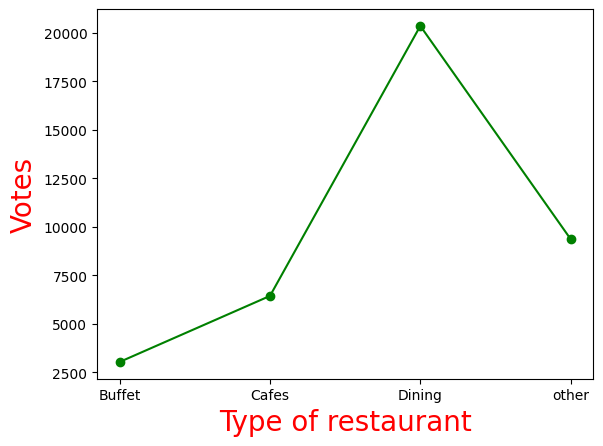

In [41]:
grouped_data = dataframe.groupby('listed_in(type)')['votes'].sum()
result = pd.DataFrame({'votes': grouped_data})
plt.plot(result, c="green", marker="o")
plt.xlabel("Type of restaurant", c="red", size=20)
plt.ylabel("Votes", c="red", size=20)

In [42]:
max_votes = dataframe['votes'].max()
restaurant_with_max_votes = dataframe.loc[dataframe['votes'] == max_votes, 'name']
 
print("Restaurant(s) with the maximum votes:")
print(restaurant_with_max_votes)

Restaurant(s) with the maximum votes:
38    Empire Restaurant
Name: name, dtype: object


<Axes: xlabel='online_order', ylabel='count'>

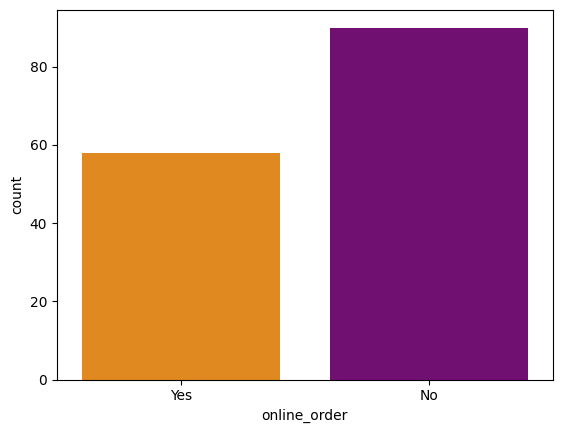

In [49]:
sns.countplot(x=dataframe['online_order'],hue=dataframe['online_order'],palette=["darkorange","purple"])

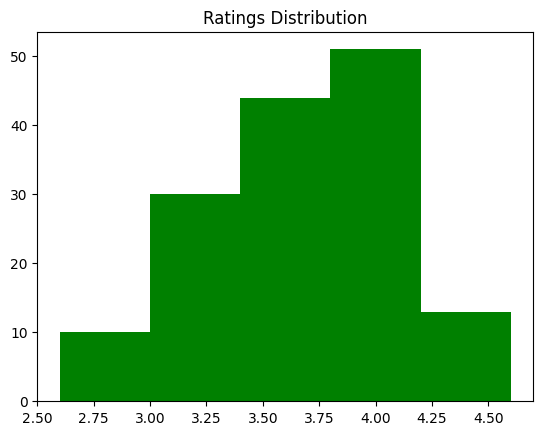

In [54]:
plt.hist(dataframe['rate'],bins=5,color="green")
plt.title("Ratings Distribution")
plt.show()



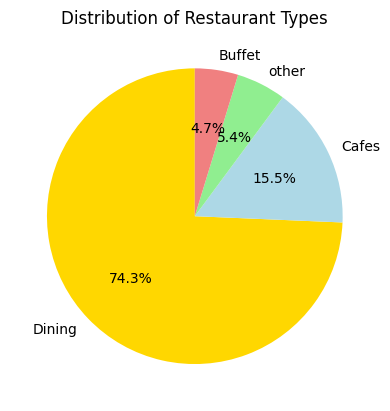

In [78]:
all_types = dataframe['listed_in(type)'].str.split(',').explode()

all_types = all_types.str.strip()

# Calculate the count of each category
category_counts = all_types.value_counts()

# Create Pie Chart
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=90, colors=['gold', 'lightblue', 'lightgreen', 'lightcoral', 'pink', 'cyan'])
plt.title('Distribution of Restaurant Types')

plt.show()

C:\Users\Maggi\AppData\Local\Temp\ipykernel_5036\1160947902.py:2: UserWarning: 
The palette list has fewer values (6) than needed (18) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(x=couple_data,hue=couple_data,palette=["darkorange","purple","pink","green","red","brown"])


<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

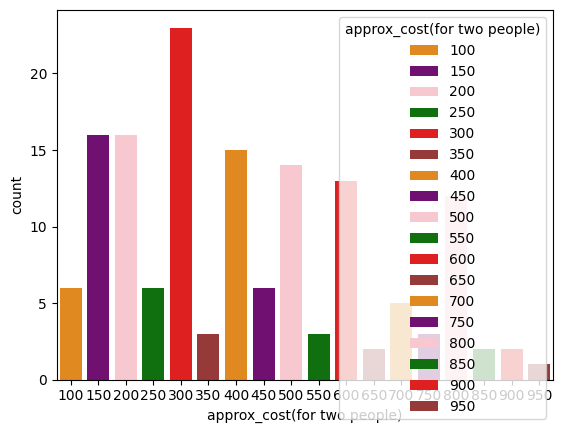

In [77]:
couple_data=dataframe['approx_cost(for two people)']
sns.countplot(x=couple_data,hue=couple_data,palette=["darkorange","purple","pink","green","red","brown"])

<Axes: xlabel='approx_cost(for two people)', ylabel='listed_in(type)'>

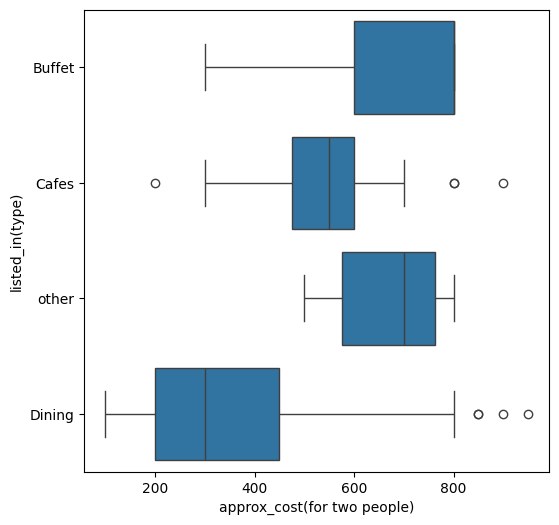

In [11]:

#dataframe= pd.read_csv("C:/Users/Maggi/Downloads/Zomatodataset.csv.csv")
plt.figure(figsize=(6,6))
sns.boxplot(x="approx_cost(for two people)",y="listed_in(type)",data=dataframe)